Twitter Network Analysis

This notebook contains a social network analysis mainly executed with the library of NetworkX. In detail, this dataset consists of 'circles' (or 'lists') from Twitter. Twitter data was crawled from public sources. The dataset includes node features (profiles), circles, and ego networks. The dataset can be found at this link: Stanford Twitter Dataset.

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

Analysis

The edges are loaded from the data folder and saved in a dataframe. Each edge is a new row and for each edge there is a start_node and an end_node column

In [3]:
twitter = pd.read_csv(
    "https://snap.stanford.edu/data/twitter_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
twitter = twitter.iloc[:80000]

The graph is created from the twitter dataframe of the edges:
List item
List item

In [4]:
G = nx.from_pandas_edgelist(twitter, "start_node", "end_node")

Visualizing the graph

Let's start our exploration by visualizing the graph. Visualization plays a central role in exploratory data analysis to help get a qualitative feel for the data.
Since we don't have any real sense of structure in the data, let's start by viewing the graph with random_layout, which is among the fastest of the layout functions.

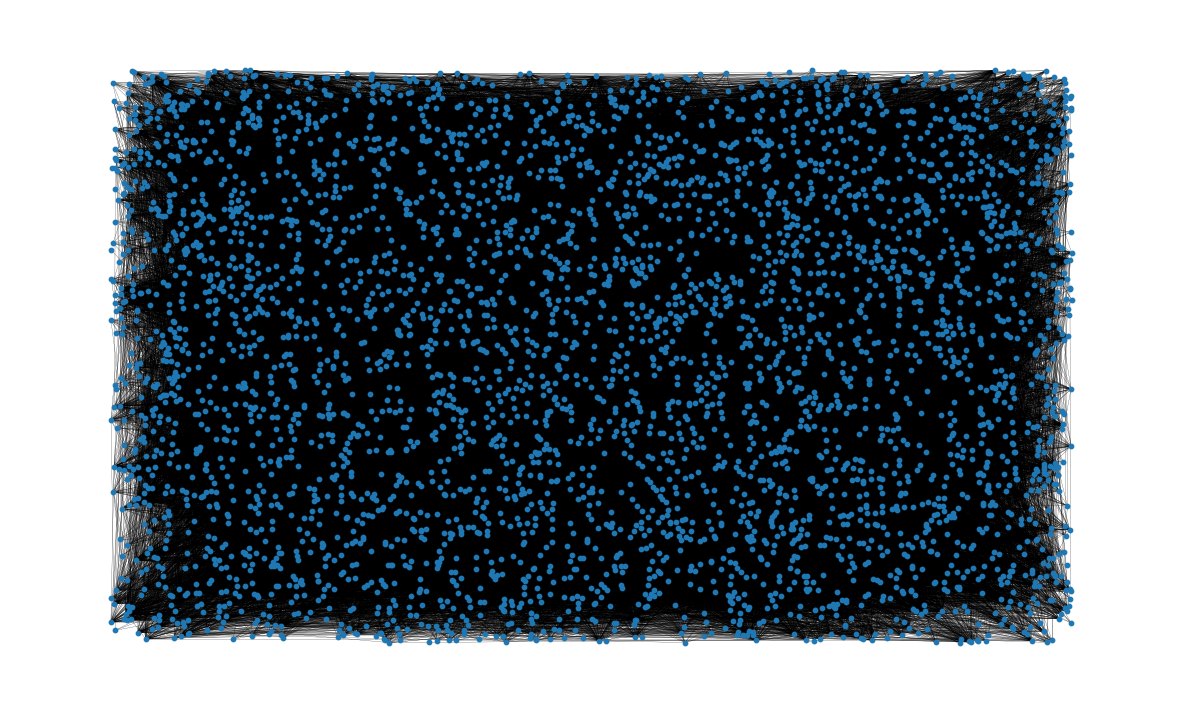

In [5]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

Do we need more or less information (nodes or edges) from the graph to do the analysis? Let's check spring_layout and continue analysis...

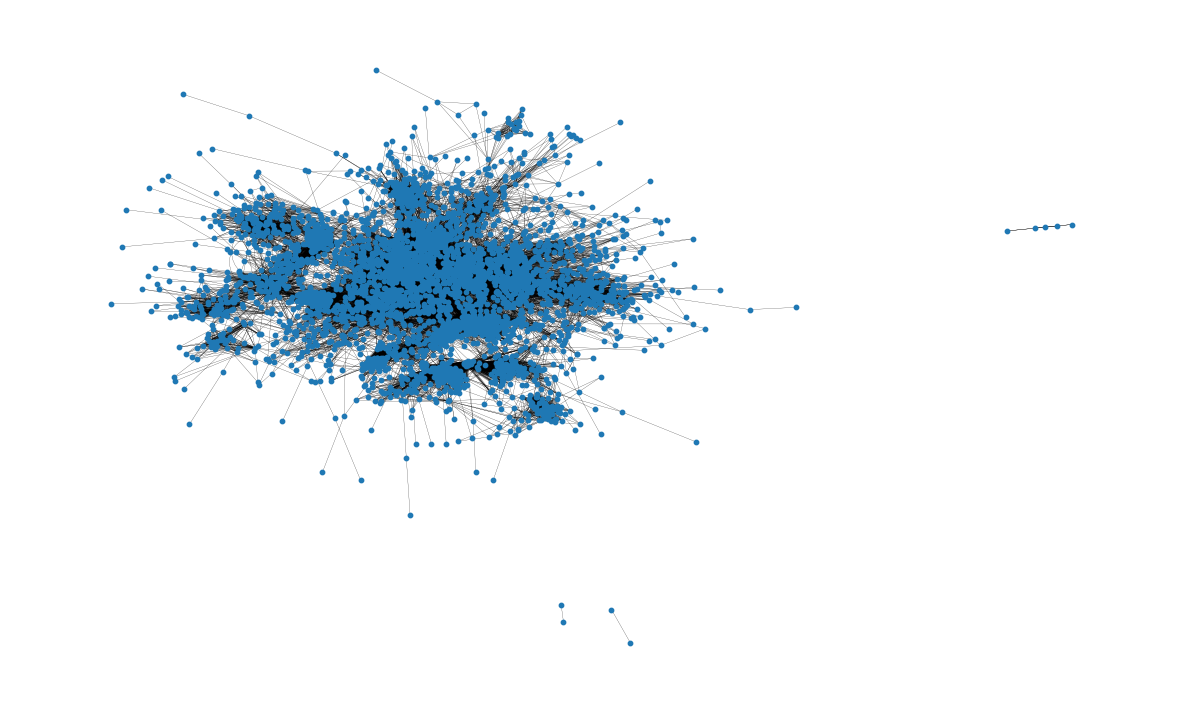

In [6]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

What other information can we extract from this network? ... (check graphs metrics)

## 1. Centralidad de grado

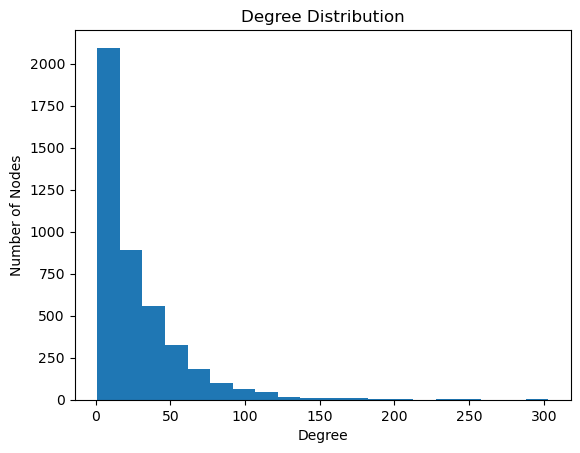

In [7]:
degrees = dict(nx.degree(G))
plt.hist(degrees.values(), bins=20)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.show()


In [22]:
num_nodes = G.number_of_nodes()
num_nodes

4316

De acuerdo a lo anterior, notamos que aproximadamente el 50% de los nodos tienen entre 0 y 15 conexiones con otros nodos, en el  contexto, esto sugiere que muchos usuarios en la red tienen relativamente pocas interacciones directas con otros usuarios. EL hecho de que muchos usuarios tengan pocas conexiones puede indicar una red dispersa con muchas micro-comunidades o usuarios aislados. Sin embargo, esto también podría ser un indicador de que la red tiene un carácter más centralizado, donde unos pocos nodos dominan las interacciones.

## 2. Betweenness

In [23]:
betweenness = nx.betweenness_centrality(G, normalized=True)
sorted_betweenness = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)

In [24]:
sorted_betweenness

[(6207392, 0.1725645640056724),
 (3359851, 0.15443758920551148),
 (783214, 0.0975291202117271),
 (41716273, 0.09272687817377762),
 (17093617, 0.09073724589851986),
 (27634404, 0.08587007531097253),
 (15666380, 0.07953763787324364),
 (48485771, 0.05738734697388068),
 (16460916, 0.053041207607038475),
 (115485051, 0.051606185977742365),
 (7860742, 0.049990437905017386),
 (15234657, 0.049657212634529505),
 (19725644, 0.04530099288567686),
 (131294912, 0.04497143191541579),
 (137156454, 0.044722845871807915),
 (10228272, 0.04226738180871095),
 (678953, 0.04138192012915093),
 (10671602, 0.04122254836051921),
 (136046012, 0.040189640037318605),
 (20674226, 0.037102598679002875),
 (3829151, 0.03590293213089152),
 (15134782, 0.03402157123258665),
 (248108296, 0.03196306532271991),
 (7861312, 0.031431525694284354),
 (4620451, 0.030797572943962594),
 (40981798, 0.029029047678193795),
 (15913, 0.028500273680575564),
 (43952326, 0.028236305279780424),
 (43003845, 0.027714099503968276),
 (70492333,

De acuerdo a lo anterior, se podría conocer cuales son los usuarios que actuan cómo puente entre distintas partes de la red. Esto permite identificar a los usuarios que conectan información en distintas comunidades o grupos sociales. Ordenado de mayor a menor con el listado de usuario con mayor centralidad de intermediación.

## 3. Comunidades

In [14]:
pip install python-louvain


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 653.1 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9389 sha256=516d6cd10f25f65dbb4cc5c8982789032de9574d9322c472449e5f055296a9ec
  Stored in directory: /Users/diegomerlanop/Library/Caches/pip/wheels/11/c1/e7/f62a211c636275e2da798bf0c307a3ae79aeddaf2524a03ce4
Successfully built python-louvain

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


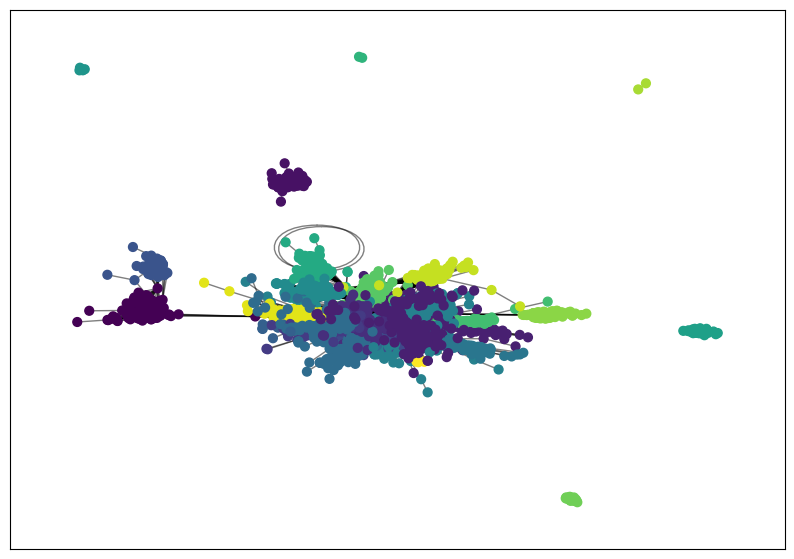

In [15]:
import community as community_louvain
partitions = community_louvain.best_partition(G)
# Visualize the community structure
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)
cmap = plt.get_cmap('viridis')
nx.draw_networkx_nodes(G, pos, node_size=40, cmap=cmap, node_color=list(partitions.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [28]:
# número de nodos por comunidad
from collections import Counter
community_sizes = Counter(partitions.values())
print("Tamaño de cada comunidad:", community_sizes)

# nodos en cada comunidad específica
for community_id in set(partitions.values()):
    print(f"Nodos en la comunidad {community_id}:")
    print([node for node, community in partitions.items() if community == community_id])


Tamaño de cada comunidad: Counter({2: 627, 3: 406, 11: 363, 0: 354, 10: 329, 8: 328, 5: 251, 19: 221, 22: 177, 4: 166, 7: 166, 17: 165, 21: 151, 14: 125, 9: 111, 1: 95, 16: 94, 6: 80, 13: 48, 23: 29, 18: 21, 12: 5, 15: 2, 20: 2})
Nodos en la comunidad 0:
[214328887, 34428380, 17116707, 28465635, 380580781, 18996905, 221036078, 153460275, 107830991, 17868918, 151338729, 222261763, 19705747, 88323281, 19933035, 149538028, 158419434, 17434613, 153226312, 364971269, 100581193, 279787626, 113058991, 69592091, 187773078, 406628822, 262802533, 460282402, 280935165, 437804658, 27633075, 285312927, 131613362, 17675120, 394263193, 254839786, 204317520, 21548772, 67864340, 172883064, 270449528, 297801196, 8088112, 14925700, 124528830, 307458983, 160237722, 220368467, 54228724, 206923844, 103598216, 207594668, 21146135, 451250774, 314316607, 6581292, 31331740, 196327549, 225444667, 274153775, 35415466, 72818790, 324201646, 40981798, 430268163, 88097807, 276308596, 358775055, 15023872, 16870853, 70

Las comunidades 2, 3, y 11 son las más grandes, con 627, 406, y 363 nodos respectivamente. Esto podría indicar que estos grupos tienen características o intereses comunes significativos que podrían ser explorados más a fondo para entender qué los hace tan conectados.

Las comunidades 12, 15, y 20 son pequeñas, todas con menos de 5 nodos. Esto puede sugerir subgrupos muy especializados o posiblemente usuarios que no están tan integrados en la red principal.

## 4. Asortatividad

In [16]:
print("Assortativity by degree:", nx.degree_assortativity_coefficient(G))


Assortativity by degree: 0.07572773506976808


Con un coeficiente de asortatividad de 0.075, la red muestra una asortatividad leve. Esto indica que hay una tendencia ligera hacia que los usuarios con un número similar de conexiones se sigan entre sí, pero no es una tendencia fuerte. La red es más o menos neutra en términos de asortatividad por grado.

## 5. Densidad de la red

In [18]:
is_connected = nx.is_connected(G)
print("Is the graph connected?", is_connected)
num_components = nx.number_connected_components(G)
print("Number of connected components:", num_components)


Is the graph connected? False
Number of connected components: 7


In [19]:
if not is_connected:
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    LCC = G.subgraph(largest_component).copy()
    
    # diametro de la red
    diameter = nx.diameter(LCC)
    print("Diameter of the largest connected component:", diameter)

Diameter of the largest connected component: 16


La red no es completamente conectada, es decir, no todos los nodos están vinculados directa o indirectamente entre sí. Esto puede deberse a la presencia de usuarios o grupos de usuarios que no interactúan o no están conectados con el resto de la red.

La red se divide en 7 componentes conectados distintos. Cada uno de estos componentes es un subconjunto del grafo donde todos los nodos dentro de ese subconjunto están interconectados, pero no hay enlaces entre estos subconjuntos y el resto de la red.

Diametro de la red 16.

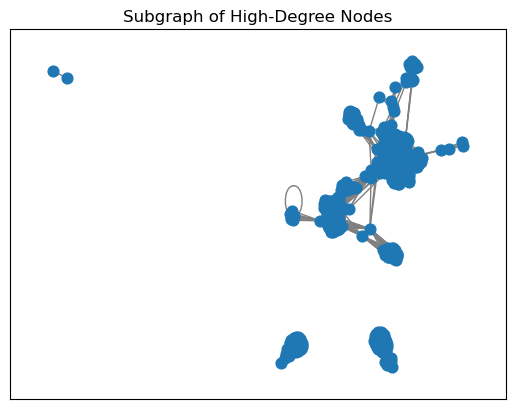

In [20]:
high_degree_nodes = [node for node, degree in nx.degree(G) if degree > 50]
subgraph = G.subgraph(high_degree_nodes)
pos = nx.spring_layout(subgraph)
nx.draw_networkx(subgraph, pos, with_labels=False, node_size=60, edge_color='gray')
plt.title('Subgraph of High-Degree Nodes')
plt.show()


Ajustando un threshold para una mejor visualización podría permitir un mejor análisis sobre la red. Siguiendo los pasos anteriores.